In [12]:
# Inital Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import hvplot.pandas
%matplotlib inline


# **Download and prepare 2022 Fear & Greed Data**

In [13]:
# Define the URL with the limit parameter to get data for the year 2022 Fear & Greed
fgi_url = 'https://api.alternative.me/fng/?limit=730'
response = requests.get(fgi_url)
response_json = response.json()

# Create a list with the data of the index for the year 2022 Fear & Greed
fg_index_list = response_json['data']

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(fg_index_list)

# Convert the timestamp to "yyyy-mm-dd" format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d')


# Convert the 'value' column to a numeric data type (float)
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Sort the DataFrame by the index (earliest date)
df.sort_index(inplace=True)

df.rename(columns={'timestamp' : 'Date', 'value' : 'BTC Greed Rating', 'value_classification' : 'Fear / Greed'}, inplace=True)
df.drop(columns=['time_until_update'], inplace=True)
df.set_index('Date', inplace=True)
# Sort the DataFrame by the index (earliest date)
df.sort_index(inplace=True)

# Filter for the year 2022-01-01 to 2022-12-31
df_2022 = df.loc['2022-01-01':'2022-12-31']

df_2022

,BTC Greed Rating,Fear / Greed
Date,,
2022-01-01,21,Extreme Fear
2022-01-02,29,Fear
2022-01-03,29,Fear
2022-01-04,23,Extreme Fear
2022-01-05,24,Extreme Fear
...,...,...
2022-12-27,27,Fear
2022-12-28,28,Fear
2022-12-29,28,Fear


<AxesSubplot:title={'center':'Bitcoin Greed Rating for 2022'}, xlabel='timestamp', ylabel='BTC Greed Rating'>

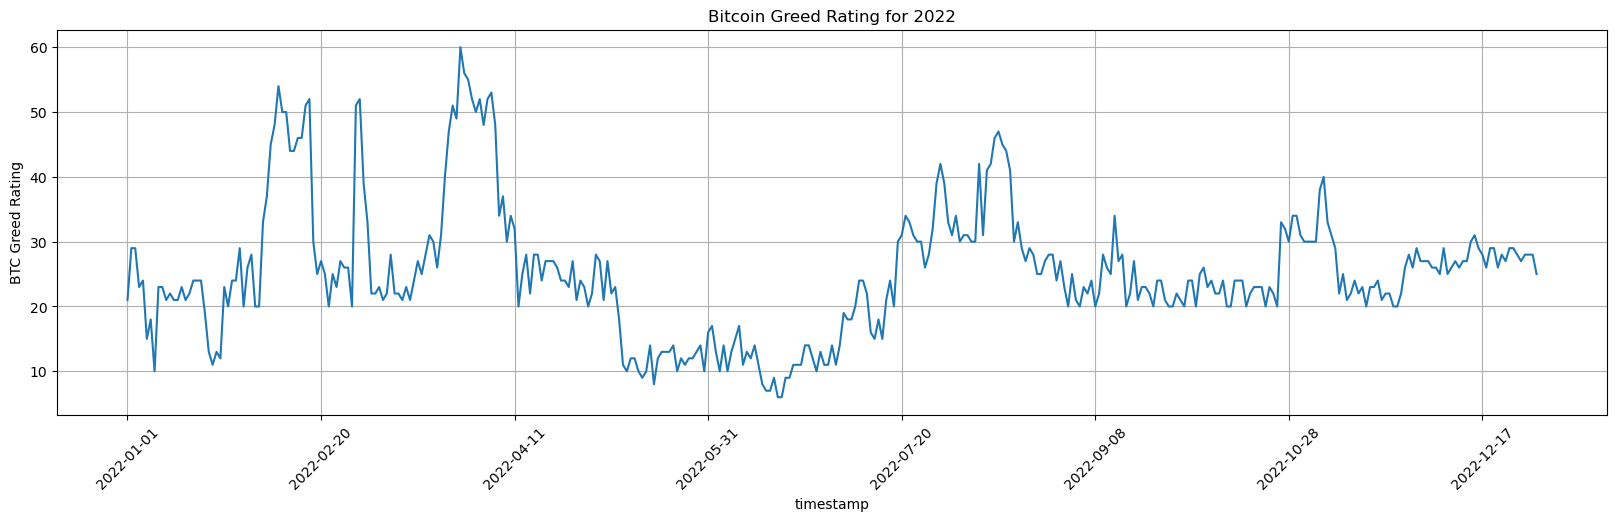

In [3]:
# Plot the data using .plot() method
fear_greed_plot = df_2022['BTC Greed Rating'].plot(
    figsize=(20, 5),
    xlabel ='timestamp',
    ylabel = 'BTC Greed Rating',
    title ='Bitcoin Greed Rating for 2022',
    rot= 45,
    grid=True
)

# Show the plot
fear_greed_plot

# **Download and Prepare 2022 S&P 500 Data**

In [4]:
# Define the ticker symbol for S&P 500 ETF (SPY)
symbol = '^GSPC'  # You can use 'SPY' for the S&P 500 ETF

# Define the start and end dates for the data
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download S&P 500 close prices
sp500_data = yf.download(symbol, start=start_date, end=end_date)

# Extract the 'Close' column and divide by 100 to match BTC Greed range
sp500_close_prices = sp500_data['Close'] / 100

# Create a DataFrame with 'Close' as the only column and convert the date index to "yyyy-mm-dd" format
sp500_close_df = pd.DataFrame({'S&P500 Close': sp500_close_prices.values}, index=sp500_close_prices.index.strftime('%Y-%m-%d'))

# Display the created DataFrame
sp500_close_df


[*********************100%%**********************]  1 of 1 completed


,S&P500 Close
Date,
2022-01-03,47.965601
2022-01-04,47.935400
2022-01-05,47.005801
2022-01-06,46.960498
2022-01-07,46.770298
...,...
2022-12-23,38.448201
2022-12-27,38.292500
2022-12-28,37.832200


<AxesSubplot:title={'center':'S&P 500 Close for 2022 (in hundreds)'}, xlabel='Date', ylabel='S&P500 Close'>

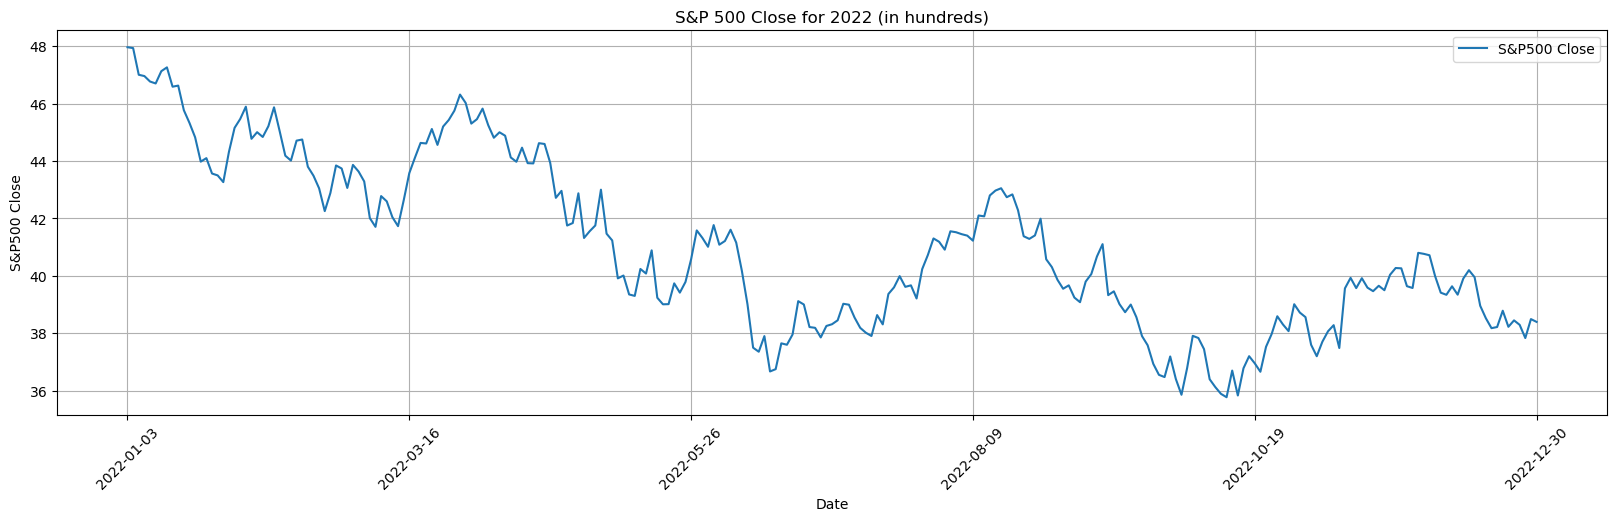

In [14]:
# Plot the data using .plot() method
sp500_close_plot = sp500_close_df.plot(
    figsize=(20, 5),
    xlabel ='Date',
    ylabel = 'S&P500 Close',
    title ='S&P 500 Close for 2022 (in hundreds)',
    rot= 45,
    grid=True
)


# Show the plot
sp500_close_plot

# **Comparing the Bitcoin Fear & Greed to the S&P500**

In [15]:
# Concat the Bitcoin Greed Rating and the S&P 500 dataframes
combined_df = pd.concat([df_2022, sp500_close_df], axis="columns", join="inner")
combined_df

,BTC Greed Rating,Fear / Greed,S&P500 Close
Date,,,
2022-01-03,29,Fear,47.965601
2022-01-04,23,Extreme Fear,47.935400
2022-01-05,24,Extreme Fear,47.005801
2022-01-06,15,Extreme Fear,46.960498
2022-01-07,18,Extreme Fear,46.770298
...,...,...,...
2022-12-23,27,Fear,38.448201
2022-12-27,27,Fear,38.292500
2022-12-28,28,Fear,37.832200


In [16]:
# Create line chart to visualize relationship between Bitcoin Greed and S&P 500
line_chart = combined_df.hvplot.line(
    x='Date',
    y=['BTC Greed Rating', 'S&P500 Close'],
    xlabel='Date',
    ylabel='S&P500 & BTC Greed',
    title='S&P500 & Bitcoin Greed 2022',
    hover_cols=['Fear / Greed'],
)

line_chart

:NdOverlay   [Variable]
   :Curve   [Date]   (value,Fear / Greed)

In [17]:
# Create scatter plot to visualize relationship between Bitcoin Greed and S&P 500
scatter_plot = combined_df.hvplot.scatter(
    x='BTC Greed Rating', 
    y='S&P500 Close', 
    xlabel='BTC Greed Rating', 
    ylabel='S&P500', 
    title='S&P500 & Bitcoin Greed 2022',
    hover_cols=['Fear / Greed'])

scatter_plot

:Scatter   [BTC Greed Rating]   (S&P500 Close,Fear / Greed)

<AxesSubplot:>

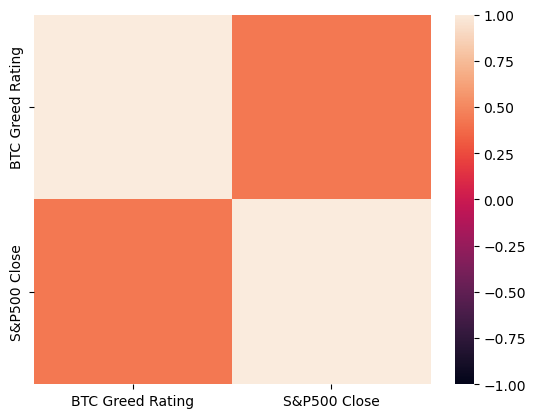

In [9]:
# Create heat map to visualize correlation between Bitcoin Greed and S&P 500
correlation = combined_df.corr()
correlation_map = sns.heatmap(correlation, vmin=-1, vmax=1)

correlation_map